# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


#'arr_0.npy','arr_1.npy','arr_2.npy','arr_3.npy' are the X_train, Y_train, X_test, Y_test files of DataSet A respectively.
#'arr_0_2.npy','arr_1_2.npy','arr_2_2.npy','arr_3_2.npy' are the X_train, Y_train, X_test, Y_test files of DataSet B respectively.
#'arr_0_3.npy','arr_1_3.npy','arr_2_3.npy','arr_3_3.npy' are the X_train, Y_train, X_test, Y_test files of DataSet C respectively.
#'arr_0_4.npy','arr_1_4.npy','arr_2_4.npy','arr_3_4.npy' are the X_train, Y_train, X_test, Y_test files of DataSet D respectively.




# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [9]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here
def get_kernel(X,kernel,kernel_param):
    n=X.shape[0]
    d=X.shape[1]
    K=np.zeros([n,n],dtype=np.float128)
    for i in range(0,n):
        u=X[i].reshape(d,1)
        for j in range(0,n):
            v=X[j].reshape(d,1)
            if kernel=='linear':
                K[i][j]=(u.transpose()).dot(v)
            elif kernel=='rbf':
                K[i][j]=np.exp(-1*kernel_param*(np.linalg.norm(u-v))**2)
            elif kernel=='poly':
                K[i][j]=(1+u.transpose().dot(v))**(kernel_param)

    return(K)                
#def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., 
#                                   kernel_param=1., num_iter_gd=100):

def get_del_R_alpha(K,Y,alpha,reg_param):
    n=Y.shape[0]
    sum=np.zeros((n,1),dtype=np.float128)
    #print("init sum: ",sum)
    for i in range(0,n):
        #print("y[i]: ",Y[i])
        #print("alpha.dot(k): ",(alpha.transpose().dot(K[:,i])))
        #print("i: ",i)
        e=-1*(-1*Y[i]*(alpha.transpose().dot(K[:,i])))
        #print("e: ",e)
        if(e<200):
            m=1
        elif(e>200):
            m=0
        else:    
            m=1/(1+np.exp(e))
        #print("m: ",m)
        f=(-1*Y[i]*K[:,i])
        #print("f: ",f)
        sum=sum+( m*f.reshape(n,1) )
        #print("iter sum: ",sum)
        #print("iter sum shape: ",sum.shape)
    #print("sum's shape: ",sum.shape)    
    return(sum/n+np.float128(reg_param*(K.dot(alpha)))  )   

def train_pred_logistic_regression(X, Y, kernel, reg_param, 
                                   kernel_param, num_iter_gd):    
    
    
    #Arguments:
    #X : (n,d) shape numpy array
    #Y : (n,)  shape numpy array
    #X_test : (m,d) shape numpy array
    #kernel = 'linear' or 'rbf' or 'poly' 
    #reg_param = $\lambda$
    #num_iter_gd = number of GD iterations.

    #Returns the result of kernel logistic regression :
    #alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    #Primal problem:
    #$ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    #the dual of which is

    #$ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    #where $\phi$ is the feature got by the kernel.

    #Where K is the nxn kernel matrix computed on the training data.

    #The kernel is defined by the kernel_param:
    #If kernel=linear: K(\u,\v) = \u^\top \v  
    #If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    #If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    

    n=X.shape[0]
    d=X.shape[1]
    K=get_kernel(X,kernel,kernel_param)
    #print("K.shape: ",K.shape)
    #print(K)
    
    alpha=np.zeros((n,1), dtype=np.float128)
    
    for i in range(0,num_iter_gd):
        del_R_alpha=get_del_R_alpha(K,Y,alpha,reg_param)
        alpha=alpha-del_R_alpha
        #print("alpha: ",alpha)
        #print("alpha's ",alpha.shape," for i=",i)

    return(alpha) 

def get_validate_error(X,X_train_validate,Y_train_validate,alpha,kernel,kernel_param):
    m=X_train_validate.shape[0]
    n=X.shape[0]
    d=X.shape[1]
    sum_error=0
    
    for j in range(0,m):
        v=X_train_validate[j].reshape(d,1)
        temp=np.zeros((n,1))
        for i in range(0,n):
            u=X[i].reshape(d,1)
            if kernel=='linear':
                temp[i]=(u.transpose()).dot(v)
            elif kernel=='rbf':
                temp[i]=np.exp(-1*kernel_param*(np.linalg.norm(u-v))**2)
            elif kernel=='poly':
                temp[i]=(1+u.transpose().dot(v))**(kernel_param)

        #print("temp shape: ",temp.shape)
        #print("alpha shape: ",alpha.shape)
        prod=alpha.transpose().dot(temp)[0][0]
        #print("prod ",prod)
        if(prod>0 and Y_train_validate[j]==-1):
            sum_error+=1
        if(prod<0 and Y_train_validate[j]==1):
            sum_error+=1    
    
    return(sum_error)



# def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
#     """
#     Return the predictions on test_X using the learnt alphas
#     """
    

    



In [10]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 
files=[('arr_0.npy','arr_1.npy','arr_2.npy','arr_3.npy'),('arr_0_2.npy','arr_1_2.npy','arr_2_2.npy','arr_3_2.npy'),('arr_0_3.npy','arr_1_3.npy','arr_2_3.npy','arr_3_3.npy'),('arr_0_4.npy','arr_1_4.npy','arr_2_4.npy','arr_3_4.npy')]

X_train_real=list()
X_train_validate=list()
Y_train_real=list()
Y_train_validate=list()

X_train_lst=list()
Y_train_lst=list()
X_test_lst=list()
Y_test_lst=list()

for w in range(0,4):
    X_train=np.load(files[w][0])
    #print(X_train)
    Y_train=np.load(files[w][1])
    X_test=np.load(files[w][2])
    Y_test=np.load(files[w][3])
    
    X_train_lst.append(X_train)
    Y_train_lst.append(Y_train)
    X_test_lst.append(X_test)
    Y_test_lst.append(Y_test)

    n=X_train.shape[0]
    val=80.0/100*n
    val=int(val)


    X_train_real.append(X_train[:val,:])
    X_train_validate.append(X_train[val:n,:])
    Y_train_real.append(Y_train[:val])
    Y_train_validate.append(Y_train[val:n])
    
#print("Y_train_re: ",Y_train_real)
#print(Y_train_real.shape)
alpha_linear=list()
alpha_rbf=list()
alpha_poly=list() 
                            
hyp_rbf=list()
hyp_poly=list()                            
                           
for s in range(0,4):                           
    kernel_arr=['linear','rbf','poly']

    lamda_list=[0.0001,0.001,0.01,0.1,1,10,100,1000]

    hyp_arr_rbf=[0.0001,0.001,0.01,0.1,1,10,100,1000]
    hyp_arr_poly=[1,2,3,4,5]

    n=X_train_real[s].shape[0]
    d=X_train_real[s].shape[1]

    #kernel_final=""
    alpha_linear_final=np.zeros((n,1))
    alpha_rbf_final=np.zeros((n,1))
    alpha_poly_final=np.zeros((n,1))

    hyp_param_final_rbf=0
    hyp_param_final_poly=0

    lamda_linear=0
    lamda_rbf=0
    lamda_poly=0

    err_linear=1000000000
    err_rbf=1000000000
    err_poly=1000000000

    for f in range(0,3):
        kernel=kernel_arr[f]
        for r in range(0,8):
            lamda=lamda_list[r]
            if(kernel=='linear'):
                #print("Gooo")
                alpha=train_pred_logistic_regression(X_train_real[s],Y_train_real[s],kernel,lamda,None,10)
                sum_error=get_validate_error(X_train_real[s],X_train_validate[s],Y_train_validate[s],alpha,kernel,None)
                #print("sum_error_linear: ",sum_error)
                if(sum_error<err_linear):
                    err_linear=sum_error
                    #kernel_final=kernel
                    alpha_linear_final=alpha
                    #hyp_param_final_linear=hyp_param
                    lamda_linear=lamda

            elif kernel=='rbf':   
                for g in range(0,8):
                    #print("Hiii")
                    hyp_param=hyp_arr_rbf[g]
                    alpha=train_pred_logistic_regression(X_train_real[s],Y_train_real[s],kernel,lamda,hyp_param,10)
                    sum_error=get_validate_error(X_train_real[s],X_train_validate[s],Y_train_validate[s],alpha,kernel,hyp_param)
                    #print("sum_error_rbf: ",sum_error)
                    if(sum_error<err_rbf):
                        err_rbf=sum_error
                        #kernel_final=kernel
                        alpha_rbf_final=alpha
                        hyp_param_final_rbf=hyp_param
                        lamda_rbf=lamda
            elif kernel=='poly':
                for g in range(0,5):
                    #print("Heyyy")
                    hyp_param=hyp_arr_poly[g]
                    alpha=train_pred_logistic_regression(X_train_real[s],Y_train_real[s],kernel,lamda,hyp_param,10)
                    sum_error=get_validate_error(X_train_real[s],X_train_validate[s],Y_train_validate[s],alpha,kernel,hyp_param)
                    #print("sum_error_poly: ",sum_error)
                    if(sum_error<err_poly):
                        err_poly=sum_error
                        #kernel_final=kernel
                        alpha_poly_final=alpha
                        hyp_param_final_poly=hyp_param
                        lamda_poly=lamda

    #print("err_linear: ",err_linear)
    #print("err_rbf: ",err_rbf)
    #print("err_poly: ",err_poly)
    #print("kernel_final: ",kernel_final)
    
    #print("alpha_linear_final: ",alpha_linear_final)
    #print("alpha_rbf_final: ",alpha_rbf_final)
    #print("alpha_poly_final: ",alpha_poly_final)
                            
    alpha_linear.append(alpha_linear_final)
    alpha_rbf.append(alpha_rbf_final)                        
    alpha_poly.append(alpha_poly_final)                        

    #print("hyp_param_final_linear: ",hyp_param_final_linear)  
    print("hyp_param_final_rbf: ",hyp_param_final_rbf) 
    hyp_rbf.append(hyp_param_final_rbf)                        
    print("hyp_param_final_poly: ",hyp_param_final_poly)
    hyp_poly.append(hyp_param_final_poly)                        

    print("lamda_linear: ",lamda_linear)
    print("lamda_rbf: ",lamda_rbf)
    print("lamda_poly: ",lamda_poly)
    
    train_error_lin=get_validate_error(X_train_real[s],X_train_lst[s],Y_train_lst[s],alpha_linear_final,'linear',None)
    train_error_rbf=get_validate_error(X_train_real[s],X_train_lst[s],Y_train_lst[s],alpha_rbf_final,'rbf',hyp_param_final_rbf)
    train_error_poly=get_validate_error(X_train_real[s],X_train_lst[s],Y_train_lst[s],alpha_poly_final,'poly',hyp_param_final_poly)
    
    test_error_lin=get_validate_error(X_train_real[s],X_test_lst[s],Y_test_lst[s],alpha_linear_final,'linear',None)
    test_error_rbf=get_validate_error(X_train_real[s],X_test_lst[s],Y_test_lst[s],alpha_rbf_final,'rbf',hyp_param_final_rbf)
    test_error_poly=get_validate_error(X_train_real[s],X_test_lst[s],Y_test_lst[s],alpha_poly_final,'poly',hyp_param_final_poly)
    
    print("train_error_lin: ",train_error_lin)
    print("train_error_rbf: ",train_error_rbf)
    print("train_error_poly: ",train_error_poly)
    print(" ")
    print("test_error_lin: ",test_error_lin)
    print("test_error_rbf: ",test_error_rbf)
    print("test_error_poly: ",test_error_poly)
    #print(data_0)
    #print(data_0.shape)
    #print(data_1.shape)
    #print(data_2.shape)
    #print(data_3.shape)
    #TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

#     1) For DataSet 1, RBF kernel performs best; almost 100 times better in test_data, w.r.t its counterparts.  
#     2) For DataSet 2, all kernels perform almost same, even when train and test data sets are compared. This shows that data is less sensitive.  
#     3) For DataSet 3, RBF has 0% error. But linear and poly kernels have high errors.   
#     4) For DataSet 4, RBF kernel has 0% error. Again, linear and poly kernels have high errors.  
#     5) 0.0001 is the best suited regularization parameter for all kernels. This represents that the model is not overfitted, and has low variance and high bias.  
#     6) 10 is the best gamma for RBF kernel. 1 is the best degree for poly kernel. The low degree is one reason why overfitting is less. 

hyp_param_final_rbf:  100
hyp_param_final_poly:  1
lamda_linear:  0.0001
lamda_rbf:  0.0001
lamda_poly:  0.0001
train_error_lin:  281
train_error_rbf:  1
train_error_poly:  229
 
test_error_lin:  84
test_error_rbf:  1
test_error_poly:  93
hyp_param_final_rbf:  10
hyp_param_final_poly:  1
lamda_linear:  0.0001
lamda_rbf:  0.01
lamda_poly:  0.0001
train_error_lin:  262
train_error_rbf:  256
train_error_poly:  326
 
test_error_lin:  100
test_error_rbf:  93
test_error_poly:  125
hyp_param_final_rbf:  10
hyp_param_final_poly:  1
lamda_linear:  0.0001
lamda_rbf:  0.0001
lamda_poly:  0.0001
train_error_lin:  754
train_error_rbf:  0
train_error_poly:  754
 
test_error_lin:  152
test_error_rbf:  0
test_error_poly:  152
hyp_param_final_rbf:  10
hyp_param_final_poly:  1
lamda_linear:  0.0001
lamda_rbf:  0.0001
lamda_poly:  0.0001
train_error_lin:  173
train_error_rbf:  0
train_error_poly:  173
 
test_error_lin:  39
test_error_rbf:  0
test_error_poly:  39


|DataSet No.|Best regularization parameter for linear kernel|Best regularization parameter for RBF kernel|Best Gamma for RBF kernel|Best regularization parameter for Poly kernel|Best degree for Poly kernel|Linear kernel train_error|RBF kernel train_error|Poly kernel train_error|Linear kernel test_error|RBF kernel test_error|Poly kernel test_error|
|-----------|-----------------------------------------------|-----------------------------------------------------|-------------------------|---------------------------------------------|---------------------------|---------------------------------|----------------------|-----------------------|-------------------------|-------------------|----------------------|
|DataSet 1|0.0001|0.0001|100|0.0001|1|18.733%|0.067%|15.2%|16.8%|0.2%|18.6%|
|DataSet 2|0.0001|0.01|10|0.0001|1|17.46%|17.06%|21.73%%|20%|18.6%|25%|
|DataSet 3|0.0001|0.0001|10|0.0001|1|50.27%|0.0%|50.27%|51.17%|0.0%|51.17%|
|DataSet 4|0.0001|0.0001|10|0.0001|1|43.25%|0.00%|43.25%|23.07%|0.00%|23.07%|


1) For DataSet 1, RBF kernel performs best; almost 100 times better in test_data, w.r.t its counterparts.  
2) For DataSet 2, all kernels perform almost same, even when train and test data sets are compared. This shows that data is less sensitive.    
3) For DataSet 3, RBF has 0% error. But linear and poly kernels have high errors.   
4) For DataSet 4, RBF kernel has 0% error. Again, linear and poly kernels have high errors.  
5) 0.0001 is the best suited regularization parameter for all kernels. This represents that the model is not overfitted, and has low variance and high bias.  
6) 10 is the best gamma for RBF kernel. 1 is the best degree for poly kernel. The low degree is one reason why overfitting is less.  



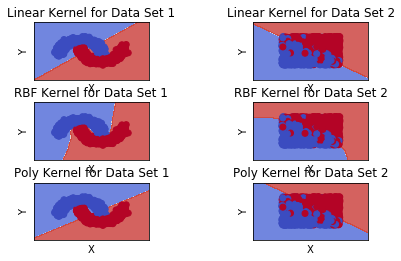

In [11]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
titles=['Linear Kernel for Data Set 1','Linear Kernel for Data Set 2','RBF Kernel for Data Set 1','RBF Kernel for Data Set 2','Poly Kernel for Data Set 1','Poly Kernel for Data Set 2']
X=list()
Y=list()
X.append(np.load('arr_0.npy'))
Y.append(np.load('arr_1.npy'))
X.append(np.load('arr_0_2.npy'))
Y.append(np.load('arr_1_2.npy'))

xx=list()
yy=list()
for s in range(0,2):
    h = .02
    x_min, x_max = X[s][:, 0].min() - 1, X[s][:, 0].max() + 1
    y_min, y_max = X[s][:, 1].min() - 1, X[s][:, 1].max() + 1
    a, b = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    xx.append(a)
    yy.append(b)

for i,alpha in enumerate((alpha_linear[0],alpha_linear[1],alpha_rbf[0],alpha_rbf[1],alpha_poly[0],alpha_poly[1])):
    plt.subplot(3,2,i+1)
    plt.subplots_adjust(wspace=0.9, hspace=0.4)
    
    #print("xx[i%2] shape: ",xx[i%2].shape)
    r=xx[i%2].shape
    
    xx_new=xx[i%2]
    yy_new=yy[i%2]
    
    X_prime=np.c_[xx[i%2].ravel(), yy[i%2].ravel()]
    #print("X_prime shape: ",X_prime.shape)
    m=X_prime.shape[0]
    n=int(80*X[i%2].shape[0]/100)
    d=X[i%2].shape[1]
    #print("d: ",d)
    sum_error=0
    
    Z=np.zeros(m)
    for j in range(0,m):
        #print("xx[i%2] shape inside: ",xx[i%2].shape)
        v=X_prime[j].reshape(d,1)
        temp=np.zeros((n,1))
        for q in range(0,n):
            #print("xx[i%2] shape in_top: ",xx[i%2].shape)
            u=X[i%2][q].reshape(d,1)
            if i==0 or i==1:
                temp[q]=(u.transpose()).dot(v)
                #print("xx[i%2] shape in: ",xx[i%2].shape)
                
            elif i==2 or i==3:
                temp[q]=np.exp(-1*hyp_rbf[i-2]*(np.linalg.norm(u-v))**2)
            elif i==4 or i==5:
                temp[q]=(1+u.transpose().dot(v))**(hyp_poly[i-4])
    
        #print("temp shape: ",temp.shape)
        #print("alpha shape: ",alpha.shape)
        prod=alpha.transpose().dot(temp)[0][0]
        #print("prod ",prod)
        if(prod>0):
            Z[j]=1
        else:
            Z[j]=-1
  
    #     for i in range(0,X.shape[0]):
    #     (clf.predict(X[i].reshape(1,-1))
    #         error+=1
    #print("Z1: ",Z)
    #print(Z.shape)
    #print("Z shape: ",Z.shape)
    #print("xx[i%2] shape down: ",xx[i%2].shape)
    #print("r: ",r)
    Z = Z.reshape(r)
    #print("Z2: ",Z)
    #print(Z.shape)
    plt.contourf(xx_new, yy_new, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[i%2][:, 0], X[i%2][:, 1], c=Y[i%2], cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx[i%2].min(), xx[i%2].max())
    plt.ylim(yy[i%2].min(), yy[i%2].max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()




# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [4]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here
def get_clf(i,X,Y,X1,Y1,kern,c,gamma_now,degree_now):
    if(i==0):
        clf=SVC(kernel=kern,C=c)
    elif(i==1):
        clf=SVC(kernel=kern,C=c,gamma=gamma_now)
    elif(i==2):
        clf=SVC(kernel=kern,C=c,degree=degree_now,gamma='scale')
    clf.fit(X,Y)
    error=0
    count=0
    
    for i in range(0,X1.shape[0]):
        if(clf.predict(X1[i].reshape(1,-1))!=Y1[i]):
            error+=1
#         print("count: ",count)
#         count+=1
    return(error,clf)        

In [5]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.
files=[('arr_0.npy','arr_1.npy','arr_2.npy','arr_3.npy'),('arr_0_2.npy','arr_1_2.npy','arr_2_2.npy','arr_3_2.npy'),('arr_0_3.npy','arr_1_3.npy','arr_2_3.npy','arr_3_3.npy'),('arr_0_4.npy','arr_1_4.npy','arr_2_4.npy','arr_3_4.npy')]
linear_svc=list()
rbf_svc=list()
poly_svc=list()
#/////////
for w in range(0,4):
    X_train=np.load(files[w][0])
    #print(X_train)
    Y_train=np.load(files[w][1])
    X_test=np.load(files[w][2])
    Y_test=np.load(files[w][3])

    n=X_train.shape[0]
    val=80.0/100*n
    val=int(val)

    # grt=-100000
    # smal=100000
    # grt_y=-100000
    # smal_y=100000
    # for i in range(0,X_train.shape[0]):
    #     if(X_train[i][0]>grt):
    #         grt=X_train[i][0]
    #     if(X_train[i][1]>grt_y):
    #         grt_y=X_train[i][1]
    #     if(X_train[i][0]<smal):
    #         smal=X_train[i][0]
    #     if(X_train[i][1]<smal_y):
    #         smal_y=X_train[i][1]


    # print("grt: ",grt)
    # print("grt_y: ",grt_y)
    # print("smal: ",smal)
    # print("smal_y: ",smal_y)


    X_train_real=X_train[:val,:]
    X_train_validate=X_train[val:n,:]
    Y_train_real=Y_train[:val]
    Y_train_validate=Y_train[val:n]
    
    clf_linear=list()
    clf_rbf=list()
    clf_poly=list()
    
    linear_c_index=0
    rbf_c_index=0
    rbf_gamma_index=0
    poly_c_index=0
    poly_degree_index=0

    kernel_list=['linear','rbf','poly']
    c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
    gamma_list=[0.0001,0.001,0.01,0.1,1,10,100,1000]
    degree_list=[1,2,3,4,5]

    min_error_linear=1000000000
    min_error_rbf=1000000000
    min_error_poly=1000000000

    final_kernel_rbf=""
    final_kernel_poly=""
    final_c_linear=0
    final_c_rbf=0
    final_c_poly=0

    k_final_rbf=0
    k_final_poly=0

    for i in range(0,3):
        for j in range(0,8):
            if(i==0):
                (error,clf)=get_clf(i,X_train_real,Y_train_real,X_train_validate,Y_train_validate,kernel_list[i],c[j],0,0)
                #print("For kernel: ",kernel_list[i],"; c: ",c[j],"; error: ",error)  
                clf_linear.append(clf)
                if(error<min_error_linear):
                    min_error_linear=error
                    #final_kernel=kernel_list[i]
                    final_c_linear=c[j]
                    linear_c_index=j
            elif(i==1):
                for k in range(0,len(gamma_list)):
                    error,clf=get_clf(i,X_train_real,Y_train_real,X_train_validate,Y_train_validate,kernel_list[i],c[j],gamma_list[k],0)
                    clf_rbf.append(clf)
                    #print("For kernel: ",kernel_list[i],"; c: ",c[j],"; gamma: ",gamma_list[k],"; error: ",error)  
                    if(error<min_error_rbf):
                        min_error_rbf=error
                        #final_kernel=kernel_list[i]
                        final_c_rbf=c[j]
                        k_final_rbf=k
                        rbf_c_index=j
                        rbf_gamma_index=k
            elif(i==2):
                 for k in range(0,len(degree_list)):
                    error,clf=get_clf(i,X_train_real,Y_train_real,X_train_validate,Y_train_validate,kernel_list[i],c[j],0,degree_list[k])
                    clf_poly.append(clf)
                    #print("For kernel: ",kernel_list[i],"; c: ",c[j],"; degree: ",degree_list[k],"; error: ",error)  
                    if(error<min_error_poly):
                        min_error_poly=error
                        #final_kernel=kernel_list[i]
                        final_c_poly=c[j]
                        k_final_poly=k
                        poly_c_index=j
                        poly_degree_index=k
      #print("\n") 
#     print("For linear, final_c_linear is: ",final_c_linear,", with min_error_linear: ",min_error_linear)    
#     print("For rbf, final_c_rbf is: ",final_c_rbf," and gamma is: ",gamma_list[k_final_rbf],", with min_error_rbf: ",min_error_rbf)
#     print("For poly, final_c_poly is: ",final_c_poly," and degree is: ",degree_list[k_final_poly],", with min_error_poly: ",min_error_poly)
    print("linear_c_index: ",linear_c_index) 
    print("rbf_c_index: ",rbf_c_index)  
    print("poly_c_index: ",poly_c_index)
    print("rbf_gamma_index: ",rbf_gamma_index)
    print("poly_degree_index: ",poly_degree_index)
    
    linear_svc.append(clf_linear[linear_c_index])
    rbf_svc.append(clf_rbf[8*rbf_c_index+rbf_gamma_index])
    poly_svc.append(clf_poly[5*poly_c_index+poly_degree_index])
    
    train_error=np.zeros(3)
    test_error=np.zeros(3)
    
    error=0
    for i in range(0,X_train.shape[0]):
        if(linear_svc[w].predict(X_train[i].reshape(1,-1))!=Y_train[i]):
            error+=1
    train_error[0]=error/X_train.shape[0]*100
    
    error=0
    for i in range(0,X_train.shape[0]):
        if(rbf_svc[w].predict(X_train[i].reshape(1,-1))!=Y_train[i]):
            error+=1
    #print("pred rbf: ",rbf_svc[w].predict(X_train[i].reshape(1,-1)))        
    train_error[1]=error/X_train.shape[0]*100
    
    error=0
    for i in range(0,X_train.shape[0]):
        if(poly_svc[w].predict(X_train[i].reshape(1,-1))!=Y_train[i]):
            error+=1
    train_error[2]=error/X_train.shape[0]*100
    
    error=0
    for i in range(0,X_test.shape[0]):
        if(linear_svc[w].predict(X_test[i].reshape(1,-1))!=Y_test[i]):
            error+=1
    test_error[0]=error/X_test.shape[0]*100
    
    error=0
    for i in range(0,X_test.shape[0]):
        if(rbf_svc[w].predict(X_test[i].reshape(1,-1))!=Y_test[i]):
            error+=1
    test_error[1]=error/X_test.shape[0]*100
    
    error=0
    for i in range(0,X_test.shape[0]):
        if(poly_svc[w].predict(X_test[i].reshape(1,-1))!=Y_test[i]):
            error+=1
    test_error[2]=error/X_test.shape[0]*100
    
    print("train_error: ",train_error)
    print("test_error: ",test_error)
    print(" ")
    
# print("len of clf_linear: ",len(clf_linear))
# print("len of clf_rbf: ",len(clf_rbf))
# print("len of clf_poly ",len(clf_poly))

# print("lin size: ",len(linear_svc))
# print("rbf size: ",len(rbf_svc))
# print("poly size: ",len(poly_svc))    
    

# print("linear_svc: ",linear_svc)
# print("rbf_svc: ",rbf_svc)
# print("poly_svc: ",poly_svc)

#train_error: [12.7333 0.06667 20.6]
#test_error: [12.8  0.2  21.2]
#train_error:  [17.         16.93333333 18.33333333]
#test_error:  [19.6 19.6 21. ]
#TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

# 1) For DataSet 1, RBF kernel is best. The same low error for this dataset was also got in Logistic Regression.    
# 2) For DataSet 2, all kernels perform equally well. Shows that data is less sensitive to classifiers.      
# 3) For DataSet 3, RBF and poly kernels perform good. But linear performs badly. Maybe data has less linear separabilty characters here.    
# 4) For DataSet 4, linear kernel performs best in test case. RBF kernel performs worst than poly or linear in the test data set. Data has linear separability properties.    
# 5) 1, 10, 0.1 are best regularization parameters for linear, RBF, poly kernels respectively.  
# 6) 10 is best gamma for RBF. 1 is best degree for poly.

linear_c_index:  4
rbf_c_index:  3
poly_c_index:  3
rbf_gamma_index:  5
poly_degree_index:  2
train_error:  [12.73333333  0.06666667  6.        ]
test_error:  [12.8  0.2  8. ]
 
linear_c_index:  4
rbf_c_index:  5
poly_c_index:  4
rbf_gamma_index:  2
poly_degree_index:  0
train_error:  [17.         16.93333333 17.06666667]
test_error:  [19.6 19.6 19.8]
 
linear_c_index:  0
rbf_c_index:  5
poly_c_index:  5
rbf_gamma_index:  1
poly_degree_index:  3
train_error:  [8.93333333 0.33333333 0.2       ]
test_error:  [11.11111111  1.68350168  3.36700337]
 
linear_c_index:  4
rbf_c_index:  5
poly_c_index:  3
rbf_gamma_index:  0
poly_degree_index:  0
train_error:  [ 3.5  3.  11.5]
test_error:  [5.91715976 7.69230769 6.50887574]
 


|DataSet No.|Best regularization parameter for linear kernel|Best regularization parameter for RBF kernel|Best Gamma for RBF kernel|Best regularization parameter for Poly kernel|Best degree for Poly kernel|Linear kernel train_error|RBF kernel train_error|Poly kernel train_error|Linear kernel test_error|RBF kernel test_error|Poly kernel test_error|
|-----------|-----------------------------------------------|-----------------------------------------------------|-------------------------|---------------------------------------------|---------------------------|---------------------------------|----------------------|-----------------------|-------------------------|-------------------|----------------------|
|DataSet 1|1|0.1|10|0.1|3|12.733%|0.067%|6%|12.8%|0.2%|8%|
|DataSet 2|1|10|0.01|1|1|17%|16.933%|17.067%|19.6%|19.6%|19.8%|
|DataSet 3|0.0001|10|0.001|10|4|8.933%|0.333%|0.2%|11.111%|1.683%|3.367%|
|DataSet 4|1|10|0.0001|0.1|1|3.5%|3%|11.5%|5.917%|7.692%|6.508%|

1) For DataSet 1, RBF kernel is best. The same low error for this dataset was also got in Logistic Regression.  
2) For DataSet 2, all kernels perform equally well. Shows that data is less sensitive to classifiers.        
3) For DataSet 3, RBF and poly kernels perform good. But linear performs badly. Maybe data has less linear separabilty characters here.    
4) For DataSet 4, linear kernel performs best in test case. RBF kernel performs worst than poly or linear in the test data set. Data has linear separability properties.    
5) 1, 10, 0.1 are best regularization parameters for linear, RBF, poly kernels respectively.  
6) 10 is best gamma for RBF. 1 is best degree for poly.  

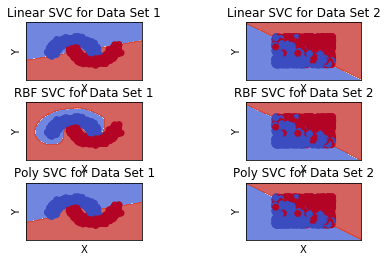

In [6]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

titles=['Linear SVC for Data Set 1','Linear SVC for Data Set 2','RBF SVC for Data Set 1','RBF SVC for Data Set 2','Poly SVC for Data Set 1','Poly SVC for Data Set 2']
X=list()
Y=list()
X.append(np.load('arr_0.npy'))
Y.append(np.load('arr_1.npy'))
X.append(np.load('arr_0_2.npy'))
Y.append(np.load('arr_1_2.npy'))

xx=list()
yy=list()
for s in range(0,2):
    h = .02
    x_min, x_max = X[s][:, 0].min() - 1, X[s][:, 0].max() + 1
    y_min, y_max = X[s][:, 1].min() - 1, X[s][:, 1].max() + 1
    a, b = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    xx.append(a)
    yy.append(b)

for i,clf in enumerate((linear_svc[0],linear_svc[1],rbf_svc[0],rbf_svc[1],poly_svc[0],poly_svc[1])):
    plt.subplot(3,2,i+1)
    plt.subplots_adjust(wspace=0.9, hspace=0.4)
    Z = clf.predict(np.c_[xx[i%2].ravel(), yy[i%2].ravel()])

#     for i in range(0,X.shape[0]):
#     (clf.predict(X[i].reshape(1,-1))
#         error+=1
    #print("Z1: ",Z)
    #print(Z.shape)
    Z = Z.reshape(xx[i%2].shape)
    #print("Z2: ",Z)
    #print(Z.shape)
    plt.contourf(xx[i%2], yy[i%2], Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[i%2][:, 0], X[i%2][:, 1], c=Y[i%2], cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx[i%2].min(), xx[i%2].max())
    plt.ylim(yy[i%2].min(), yy[i%2].max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [4]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)
def take_third(l):
    return(l[3])

def srt(l):
    return(l[0])

# def check(X,Y,i_final,j_final,gt_or_lt):
#     n=X.shape[0]
#     d=X.shape[1]
    
#     yes_count=0
#     no_count=0
#     y_plus_count=0
#     y_minus_count=0
    
#     x=X[i_final][j_final]
#     for i in range(0,n):
#         if(gt_or_lt==0):
#             if(X[i][j_final]>=x):
#                 yes_count+=1
#             else:
#                 no_count+=1
#         else:
#             if(X[i][j_final]<x):
#                 yes_count+=1
#             else:
#                 no_count+=1
#     if(yes_count==0 or no_count==0):
#         return -1
#     return 0

def H(x):
    #print("In H, x: ",x)
    if(x==0):
        return(0)
    elif x==1:
        return(0)
    return(x*np.log2(1/x)+(1-x)*np.log2(1/(1-x)))

def find_min_x(X,Y,num_nodes_stop,criterion):
    n=X.shape[0]
    d=X.shape[1]
    
    #print("n: ",n)
    #print("d: ",d)
    
    l=list()
    max_accuracy=0
    
    min_entropy=1000000000
    i_final=0
    j_final=0
    gt_or_lt=0
    for j in range(0,d):
        for i in range(0,n):
            x=X[i][j]
            if criterion=="accuracy":
                count=0
                count2=0
                
                for k in range(0,n):
                    if(X[k][j]>=x):
                        count2+=1
                if(count2==0 or count2==n):
                    continue
                
                for k in range(0,n):
                    if((X[k][j]>=x and Y[k]==1) or (X[k][j]<x and Y[k]==-1)):
                        count+=1

                f= count*1.0/n       
                if(f > 1-f):
                    max_accuracy=f
                    i_final=i
                    j_final=j
                    gt_or_lt=0
                    l.append((i_final,j_final,gt_or_lt,max_accuracy))
                else:
                    max_accuracy=1-f
                    i_final=i
                    j_final=j
                    gt_or_lt=1
                    l.append((i_final,j_final,gt_or_lt,max_accuracy))
            
            elif(criterion=='entropy'):
                frac_left=0
                frac_right=0
                frac_plus_left=0
                frac_plus_right=0
                count=0
                
                for k in range(0,n):
                    if(X[k][j]>=x):
                        frac_right+=1
                        if(Y[k]==1):
                            frac_plus_right+=1
                    else:
                        frac_left+=1
                        if(Y[k]==1):
                            frac_plus_left+=1
                            
                if(frac_left==0 or frac_left==n or frac_right==0 or frac_right==n):
                    continue            
                
                frac_plus_left=frac_plus_left/frac_left
                frac_plus_right=frac_plus_right/frac_right
                frac_left=frac_left*1.0/n
                frac_right=frac_right*1.0/n
                
                
                entr=frac_left*H(frac_plus_left)+frac_right*H(frac_plus_right)
                if(entr<min_entropy):
                    min_entropy=entr
                    i_final=i
                    j_final=j
                    for k in range(0,n):
                        if((X[k][j]>=x and Y[k]==1) or (X[k][j]<x and Y[k]==-1)):
                            count+=1

                    f= count*1.0/n       
                    if(f > 1-f):
                        l.append((i_final,j_final,0,min_entropy))
                    else:
                        l.append((i_final,j_final,1,min_entropy))
                
    
    if criterion=='accuracy':
        l.sort(key=take_third)
    else:
        l.sort(key=take_third,reverse=True)
    #print("l_top:: ",l)
    for i in range(len(l)-1,-1,-1):
       # print("i top: ",i)
    
        #a=check(X,Y,l[i][0],l[i][1],l[i][2])
        
        #print("a: ",a)
        #if(a==0):
        i_final=l[i][0]
        j_final=l[i][1]
        gt_or_lt=l[i][2]
        if criterion=='accuracy':
            max_accuracy=l[i][3]
        else:
            min_entropy=l[i][3]
        break
    if criterion=='accuracy':        
        return((i_final,j_final,gt_or_lt,max_accuracy))
    return((i_final,j_final,gt_or_lt,min_entropy))

def train_call(X, Y, num_nodes_stop, criterion,final_list,position_in_tree):
    n=X.shape[0]
    d=X.shape[1]
    if(n<=num_nodes_stop):
        if(position_in_tree%2==0):
            final_list.append((position_in_tree,None,None,None,1))
        elif(position_in_tree%2==1):
            final_list.append((position_in_tree,None,None,None,-1))    
        return final_list
    (i_final,j_final,gt_or_lt,max_accuracy)=find_min_x(X,Y,num_nodes_stop,criterion)
    #print((i_final,j_final,gt_or_lt,max_accuracy))
    
#     print("curr position in tree: ",position_in_tree)
#     print("i_final: ",i_final)
#     print("j_final: ",j_final)
#     print("gt_or_lt: ",gt_or_lt)
#     print("max_accuracy: ",max_accuracy)
    #print(X[i_final][j_final])
    yes_count=0
    no_count=0
    y_plus_count=0
    y_minus_count=0
    
    x=X[i_final][j_final]
    for i in range(0,n):
        if(gt_or_lt==0):
            if(X[i][j_final]>=x):
                yes_count+=1
            else:
                no_count+=1
        else:
            if(X[i][j_final]<x):
                yes_count+=1
            else:
                no_count+=1
        if Y[i]==1:
            y_plus_count+=1
        elif Y[i]==-1:
            y_minus_count+=1
    
    X_child_left=np.zeros((yes_count,d))
    X_child_right=np.zeros((no_count,d))
    Y_child_left=np.zeros(yes_count)
    Y_child_right=np.zeros(no_count)
    
    k_right=0
    k_left=0
    
    left_plus_y=0
    left_minus_y=0
    right_plus_y=0
    right_minus_y=0
    
    for i in range(0,n):
        if(gt_or_lt==0):
            if(X[i][j_final]>=x):
                for k in range(0,d):
                    X_child_left[k_left][k]=X[i][k] 
                if(Y[i]==1):
                    left_plus_y+=1
                    Y_child_left[k_left]=1
                else:
                    left_minus_y+=1
                    Y_child_left[k_left]=-1
                k_left+=1    
            else:
                for k in range(0,d):
                    X_child_right[k_right][k]=X[i][k]
                if(Y[i]==-1):
                    right_minus_y+=1
                    Y_child_right[k_right]=-1
                else:
                    right_plus_y+=1
                    Y_child_right[k_right]=1
                k_right+=1     
        else:
            if(X[i][j_final]<x):
                for k in range(0,d):
                    X_child_left[k_left][k]=X[i][k]
                if(Y[i]==1):
                    left_plus_y+=1
                    Y_child_left[k_left]=1
                else:
                    left_minus_y+=1
                    Y_child_left[k_left]=-1
                k_left+=1   
                 
            else:
                for k in range(0,d):
                    X_child_right[k_right][k]=X[i][k]
                if(Y[i]==-1):
                    right_minus_y+=1
                    Y_child_right[k_right]=-1
                else:
                    right_plus_y+=1
                    Y_child_right[k_right]=1
                k_right+=1  
            
     
    final_list.append((position_in_tree,j_final,gt_or_lt,x,None))
    
    #if(left_plus_y==0):
    
#     print("final_list: ",final_list)
#     print("left_plus_y: ",left_plus_y)
#     print("left_minus_y: ",left_minus_y)
#     print("right_plus_y: ",right_plus_y)
#     print("right_minus_y: ",right_minus_y)
#     print("n: ",n)
#     print("all y sum: ",left_plus_y+right_plus_y+left_minus_y+right_minus_y)
#     print("\n")
    
    f1=final_list
    flag1=0
    flag2=0
    if(left_plus_y==0):
        final_list.append((2*position_in_tree,None,None,None,-1))
        flag1=1
    elif(left_minus_y==0):
        final_list.append((2*position_in_tree,None,None,None,1))
        flag1=1
    else:
        f1=train_call(X_child_left,Y_child_left,num_nodes_stop,criterion,final_list,2*position_in_tree)
#         print("finaL_list la vuelta: ",final_list)
#         if(f1==final_list):
#             print("heyy")
#             f1.append((2*position_in_tree,None,None,None,1))
#         print("f1: ",f1)    
    
    if flag1==1:
        f1=final_list
    f2=f1
    
    if(right_plus_y==0):
        final_list.append((2*position_in_tree+1,None,None,None,-1))
        flag2=1
    elif(right_minus_y==0):
        final_list.append((2*position_in_tree+1,None,None,None,1))
        flag2=1
    else:
        f2=train_call(X_child_right,Y_child_right,num_nodes_stop,criterion,f1,2*position_in_tree+1)
#         if(f2==f1):
#             print("heyy2")
#             f2.append((2*position_in_tree+1,None,None,None,-1))
#         print("f2: ",f2)    

    if flag2==1:
        f2=final_list
    return(f2)    

    
def train_decision_tree(X, Y, num_nodes_stop, criterion):
#Returns a decision tree trained on X and Y. 
#Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
#Split criterion can be either 'accuracy' or 'entropy'.
#Returns a tree (In whatever format that you find appropriate)
    final_list=list()
    f2=train_call(X, Y,num_nodes_stop,criterion,final_list,1)
#     last_in_f2=f2[len(f2)-1]
#     if(last_in_f2[4]==-1):
#         f2.append((last_in_f2[0]+1,None,None,None,1))
#     else:
#         f2.append((last_in_f2[0]+1,None,None,None,-1))
    #print("final f222: ",f2)    
    f2.sort(key=srt)    
    return f2
    
def eval_decision_tree(tree, test_X):
    
# Takes in a tree, and a bunch of instances X and 
#returns the tree predicted values at those instances."""
    count=0
    n=test_X.shape[0]
    index=1
    fin_y_list=list()
    curr_node=list()
    
    for i in range(0,n):
        index=1
        #print("At start: tree: ",tree)
        curr_node=[0]*len(tree[0])
        for g in range(0,len(tree[0])):
            #print("tree[0][g]: ",tree[0][g])
            if(tree[0][g]==None):
                curr_node[g]=None
            else:
                curr_node[g]=tree[0][g]
        #print("curr_node: ",curr_node)
        #print("i: ",i)
        #print("test_X[i]: ",test_X[i])
        while(curr_node[1]!=None or curr_node[2]!=None or curr_node[3]!=None):
            if(curr_node[2]==0):
                if(test_X[i][curr_node[1]]>=curr_node[3]):
                    for r in range(0,len(tree)):
                        if(tree[r][0]==2*index):
                            curr_node=[0]*len(tree[r])
                            for h in range(0,len(tree[r])):
                                curr_node[h]=tree[r][h]
                            #curr_node=tree[r]
                            index=2*index
                            break
                else:
                    for r in range(0,len(tree)):
                          if(tree[r][0]==2*index+1):
                            curr_node=[0]*len(tree[r])
                            for h in range(0,len(tree[r])):
                                curr_node[h]=tree[r][h]
                            #curr_node=tree[r]
                            index=2*index+1
                            break 
                    

            else:
                if(test_X[i][curr_node[1]]<curr_node[3]):
                    for r in range(0,len(tree)):
                        if(tree[r][0]==2*index):
                            curr_node=[0]*len(tree[r])
                            for h in range(0,len(tree[r])):
                                curr_node[h]=tree[r][h]
                            #curr_node=tree[r]
                            index=2*index
                            break
                else:
                    for r in range(0,len(tree)):
                        if(tree[r][0]==2*index+1):
                            curr_node=[0]*len(tree[r])
                            for h in range(0,len(tree[r])):
                                curr_node[h]=tree[r][h]
                            #curr_node=tree[r]
                            index=2*index+1
                            break 
            #print("new curr_node: ",curr_node)                
            #print("new index: ",index)
        fin_y_list.append(curr_node[4])
        #print("fin_y_list: ",fin_y_list,"\n")
        
    #print("fin_y_list: ",fin_y_list)
    return fin_y_list
            

In [13]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

files=[('arr_0.npy','arr_1.npy','arr_2.npy','arr_3.npy'),('arr_0_2.npy','arr_1_2.npy','arr_2_2.npy','arr_3_2.npy'),('arr_0_3.npy','arr_1_3.npy','arr_2_3.npy','arr_3_3.npy'),('arr_0_4.npy','arr_1_4.npy','arr_2_4.npy','arr_3_4.npy')]
linear_svc=list()
rbf_svc=list()
poly_svc=list()
tree=list()
#/////////
for w in range(0,4):
    X_train=np.load(files[w][0])
    #print(X_train)
    Y_train=np.load(files[w][1])
    X_test=np.load(files[w][2])
    Y_test=np.load(files[w][3])

    n=X_train.shape[0]
    val=80.0/100*n
    val=int(val)

    X_train_real=X_train[:val,:]
    X_train_validate=X_train[val:n,:]
    Y_train_real=Y_train[:val]
    Y_train_validate=Y_train[val:n]
    
    percent=[90,80,70,60,50,40,30,20,10]
    #percent=[90,80,70,60,50,40]
    final_count=100000000000
    final_percent=0
    
    for i in range(0,len(percent)):
        count=0
        trial_tree=train_decision_tree(X_train_real,Y_train_real,int((percent[i]*val)/100),"accuracy")
    #tree=train_decision_tree(X_train_real,Y_train_real,530,"accuracy")
    #print("\ntree: ",tree)
        test_tree_y=eval_decision_tree(trial_tree, X_train_validate)
        for j in range(0,X_train_validate.shape[0]):
            if(test_tree_y[j]!=Y_train_validate[j]):
                count+=1
        print("for percent[i]= ",percent[i]," , count is: ",count)
        if count<final_count:
            final_count=count
            final_percent=percent[i]
            trial_tree_final=trial_tree
    print("final_count: ",final_count," ; final_percent: ",final_percent) 
    tree.append(trial_tree_final)

    train_error=0
    test_error=0

    final_percent=50

    count=0
    #t_tree=train_decision_tree(X_train,Y_train,int((final_percent*X_train.shape[0])/100),"accuracy")
    t_tree=tree[w]
    test_tree_y=eval_decision_tree(t_tree, X_train)
    for j in range(0,X_train.shape[0]):
         if(test_tree_y[j]!=Y_train[j]):
            count+=1

    train_error=count/X_train.shape[0]*100
    print("train_error: ",train_error)

    count=0
    test_tree_y=eval_decision_tree(t_tree, X_test)
    for j in range(0,X_test.shape[0]):
         if(test_tree_y[j]!=Y_test[j]):
            count+=1  
    test_error=count/X_test.shape[0]*100
    print("test_error: ",test_error)  




# DataSet 1: 
# final_count:  33  ; final_percent:  40. 
# train_error:  8.6
# test_error:  10.8

#DataSet 2:
# final_count:  71  ; final_percent:  40
# train_error:  19.6
# test_error:  21.4

#DataSet  3:
# train_error:  16.53333333333333
# test_error:  17.17171717171717

#Data Set 4:
# final_count:  5  ; final_percent:  40
# train_error:  5.25
# test_error:  14.792899408284024

#TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic). 

for percent[i]=  90  , count is:  51
for percent[i]=  80  , count is:  51
for percent[i]=  70  , count is:  51
for percent[i]=  60  , count is:  51
for percent[i]=  50  , count is:  41
for percent[i]=  40  , count is:  33
for percent[i]=  30  , count is:  42
for percent[i]=  20  , count is:  47
for percent[i]=  10  , count is:  51
final_count:  33  ; final_percent:  40
train_error:  8.6
test_error:  10.8
for percent[i]=  90  , count is:  83
for percent[i]=  80  , count is:  83
for percent[i]=  70  , count is:  83
for percent[i]=  60  , count is:  83
for percent[i]=  50  , count is:  76
for percent[i]=  40  , count is:  71
for percent[i]=  30  , count is:  83
for percent[i]=  20  , count is:  81
for percent[i]=  10  , count is:  78
final_count:  71  ; final_percent:  40
train_error:  19.6
test_error:  21.4
for percent[i]=  90  , count is:  55
for percent[i]=  80  , count is:  55
for percent[i]=  70  , count is:  55
for percent[i]=  60  , count is:  55
for percent[i]=  50  , count is:  4

|DataSet No.|% of training data points to stop splitting of tree |Train_error|Test_error|
|-----------|-----------------------------------------|-----------|----------|
|DataSet 1  |                       40%               |   8.6%    | 10.8%    |  
|DataSet 2  |                       40%               |   19.6%   | 21.4%    |
|DataSet 3  |                       50%               |   16.6%   | 16.83%   |
|DataSet 4  |                       40%               |   3.75%   | 10.05%   |

We see that for all datasets except the last, train_error and test_error are almost the same. That being said, still, dataset 4 has the least train and test error. 
DataSet 1 also has quite low errors. This is, as can be seen from diagram, rectangles classifying the data can be drawn. However, due to the distribution of dataset 2, a good separation is not possible. So, we get comparatively higher errors.

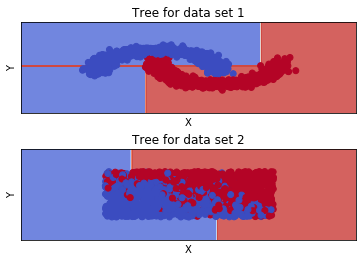

In [21]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
titles=['Tree for data set 1','Tree for data set 2']
X=list()
Y=list()
X.append(np.load('arr_0.npy'))
Y.append(np.load('arr_1.npy'))
X.append(np.load('arr_0_2.npy'))
Y.append(np.load('arr_1_2.npy'))

xx=list()
yy=list()
for s in range(0,2):
    h = .02
    x_min, x_max = X[s][:, 0].min() - 1, X[s][:, 0].max() + 1
    y_min, y_max = X[s][:, 1].min() - 1, X[s][:, 1].max() + 1
    a, b = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    xx.append(a)
    yy.append(b)

for i,tre in enumerate((tree[0],tree[1])):
    plt.subplot(2,1,i+1)
    plt.subplots_adjust(wspace=0.9, hspace=0.4)
    X_prime=np.c_[xx[i%2].ravel(), yy[i%2].ravel()]
    
    Z=np.array(eval_decision_tree(tre, X_prime))
#     for j in range(0,X_prime.shape[0]):
#         if(test_tree_y[j]!=Y_train_validate[j]):
#             count+=1

    
    #print("Z1: ",Z)
    #print(Z.shape)
    Z = Z.reshape(xx[i%2].shape)
    #print("Z2: ",Z)
    #print(Z.shape)
    plt.contourf(xx[i%2], yy[i%2], Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[i%2][:, 0], X[i%2][:, 1], c=Y[i%2], cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx[i%2].min(), xx[i%2].max())
    plt.ylim(yy[i%2].min(), yy[i%2].max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()



# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [57]:
# CodeWrite cell
# Write Random Forest classifier. 
def take_third(l):
    return(l[3])

def srt(l):
    return(l[0])
def H(x):
    #print("In H, x: ",x)
    if(x==0):
        return(0)
    elif x==1:
        return(0)
    return(x*np.log2(1/x)+(1-x)*np.log2(1/(1-x)))


# def check(X,Y,i_final,j_final,gt_or_lt):
#     n=X.shape[0]
#     d=X.shape[1]
    
#     yes_count=0
#     no_count=0
#     y_plus_count=0
#     y_minus_count=0
    
#     x=X[i_final][j_final]
#     for i in range(0,n):
#         if(gt_or_lt==0):
#             if(X[i][j_final]>=x):
#                 yes_count+=1
#             else:
#                 no_count+=1
#         else:
#             if(X[i][j_final]<x):
#                 yes_count+=1
#             else:
#                 no_count+=1
#     if(yes_count==0 or no_count==0):
#         return -1
#     return 0

def find_min_x(X,Y,num_nodes_stop,criterion):
    n=X.shape[0]
    d=X.shape[1]
    
    #print("n: ",n)
    #print("d: ",d)
    
    l=list()
    max_accuracy=0
    min_entropy=1000000000
    i_final=0
    j_final=0
    gt_or_lt=0
    
    attr=list()
    for r in range(0,int(d/2)):
        attr.append(np.random.randint(0, d-1))
    
    for j in attr:
        for i in range(0,n):
            x=X[i][j]
            if criterion=="accuracy":
                count=0
                count2=0
                
                for k in range(0,n):
                    if(X[k][j]>=x):
                        count2+=0
                if(count2==0 or count2==n):
                    continue
                
                for k in range(0,n):
                    if((X[k][j]>=x and Y[k]==1) or (X[k][j]<x and Y[k]==-1)):
                        count+=1

                f= count*1.0/n   
                
                
                if(f > 1-f):
                    max_accuracy=f
                    i_final=i
                    j_final=j
                    gt_or_lt=0
                    l.append((i_final,j_final,gt_or_lt,max_accuracy))
                else:
                    max_accuracy=1-f
                    i_final=i
                    j_final=j
                    gt_or_lt=1
                    l.append((i_final,j_final,gt_or_lt,max_accuracy))
                    
            elif(criterion=='entropy'):
                #print("In ENTROPY")
                frac_left=0
                frac_right=0
                frac_plus_left=0
                frac_plus_right=0
                count=0
                #print("x: ",x)
                for k in range(0,n):
                    #print("X[",k,"][",j,"]=",X[k][j])
                    if(X[k][j]>=x):
                        frac_right+=1
                        if(Y[k]==1):
                            frac_plus_right+=1
                    else:
                        frac_left+=1
                        if(Y[k]==1):
                            frac_plus_left+=1
                #print("n: ",n)
                #print("frac_left: ",frac_left)
                #print("frac_right: ",frac_right)
                if(frac_left==0 or frac_left==n or frac_right==0 or frac_right==n):
                    continue            
                
                frac_plus_left=frac_plus_left/frac_left
                frac_plus_right=frac_plus_right/frac_right
                frac_left=frac_left*1.0/n
                frac_right=frac_right*1.0/n
                
                
                entr=frac_left*H(frac_plus_left)+frac_right*H(frac_plus_right)
                if(entr<min_entropy):
                    min_entropy=entr
                    i_final=i
                    j_final=j
                    for k in range(0,n):
                        if((X[k][j]>=x and Y[k]==1) or (X[k][j]<x and Y[k]==-1)):
                            count+=1

                    f= count*1.0/n       
                    if(f > 1-f):
                        l.append((i_final,j_final,0,min_entropy))
                    else:
                        l.append((i_final,j_final,1,min_entropy)) 
    #print("l_earlier: ",l)                    
    if(criterion=='accuracy'):                    
        l.sort(key=take_third)
    else:
        l.sort(key=take_third,reverse=True)
    #print("l: ",l)    
    #print("l_top:: ",l)
    for i in range(len(l)-1,-1,-1):
       # print("i top: ",i)
        #a=check(X,Y,l[i][0],l[i][1],l[i][2])
        #print("a: ",a)
        #if(a==0):
        i_final=l[i][0]
        j_final=l[i][1]
        gt_or_lt=l[i][2]
        if(criterion=='accuracy'):
            max_accuracy=l[i][3]
        else:
            min_entropy=l[i][3]
        break
    if(criterion=='accuracy'):    
        return((i_final,j_final,gt_or_lt,max_accuracy))
    else:
        return((i_final,j_final,gt_or_lt,min_entropy))

def forest_train_call(X, Y, num_nodes_stop, criterion,final_list,position_in_tree):
    n=X.shape[0]
    d=X.shape[1]
    if(n<=num_nodes_stop):
        if(position_in_tree%2==0):
            final_list.append((position_in_tree,None,None,None,1))
        elif(position_in_tree%2==1):
            final_list.append((position_in_tree,None,None,None,-1))    
        return final_list
    (i_final,j_final,gt_or_lt,max_acc_min_entr)=find_min_x(X,Y,num_nodes_stop,criterion)
     #print((i_final,j_final,gt_or_lt,max_accuracy))
    '''
    print("curr position in tree: ",position_in_tree)
    print("i_final: ",i_final)
    print("j_final: ",j_final)
    print("gt_or_lt: ",gt_or_lt)
    if(criterion=='accuracy'):
        print("max_accuracy: ",max_acc_min_entr)
    else:
        print("min_entropy: ",max_acc_min_entr)
    print(X[i_final][j_final])
    '''
    yes_count=0
    no_count=0
    y_plus_count=0
    y_minus_count=0
    
    x=X[i_final][j_final]
    for i in range(0,n):
        if(gt_or_lt==0):
            if(X[i][j_final]>=x):
                yes_count+=1
            else:
                no_count+=1
        else:
            if(X[i][j_final]<x):
                yes_count+=1
            else:
                no_count+=1
        if Y[i]==1:
            y_plus_count+=1
        elif Y[i]==-1:
            y_minus_count+=1
    
    X_child_left=np.zeros((yes_count,d))
    X_child_right=np.zeros((no_count,d))
    Y_child_left=np.zeros(yes_count)
    Y_child_right=np.zeros(no_count)
    
    k_right=0
    k_left=0
    
    left_plus_y=0
    left_minus_y=0
    right_plus_y=0
    right_minus_y=0
    
    for i in range(0,n):
        if(gt_or_lt==0):
            if(X[i][j_final]>=x):
                for k in range(0,d):
                    X_child_left[k_left][k]=X[i][k] 
                if(Y[i]==1):
                    left_plus_y+=1
                    Y_child_left[k_left]=1
                else:
                    left_minus_y+=1
                    Y_child_left[k_left]=-1
                k_left+=1    
            else:
                for k in range(0,d):
                    X_child_right[k_right][k]=X[i][k]
                if(Y[i]==-1):
                    right_minus_y+=1
                    Y_child_right[k_right]=-1
                else:
                    right_plus_y+=1
                    Y_child_right[k_right]=1
                k_right+=1     
        else:
            if(X[i][j_final]<x):
                for k in range(0,d):
                    X_child_left[k_left][k]=X[i][k]
                if(Y[i]==1):
                    left_plus_y+=1
                    Y_child_left[k_left]=1
                else:
                    left_minus_y+=1
                    Y_child_left[k_left]=-1
                k_left+=1   
                 
            else:
                for k in range(0,d):
                    X_child_right[k_right][k]=X[i][k]
                if(Y[i]==-1):
                    right_minus_y+=1
                    Y_child_right[k_right]=-1
                else:
                    right_plus_y+=1
                    Y_child_right[k_right]=1
                k_right+=1  
            
     
    final_list.append((position_in_tree,j_final,gt_or_lt,x,None))
    
    #if(left_plus_y==0):
    
    '''
    print("final_list: ",final_list)
    print("left_plus_y: ",left_plus_y)
    print("left_minus_y: ",left_minus_y)
    print("right_plus_y: ",right_plus_y)
    print("right_minus_y: ",right_minus_y)
    print("n: ",n)
    print("all y sum: ",left_plus_y+right_plus_y+left_minus_y+right_minus_y)
    print("\n")
    '''
    f1=final_list
    flag1=0
    flag2=0
    if(left_plus_y==0):
        final_list.append((2*position_in_tree,None,None,None,-1))
        flag1=1
    elif(left_minus_y==0):
        final_list.append((2*position_in_tree,None,None,None,1))
        flag1=1
    else:
        f1=forest_train_call(X_child_left,Y_child_left,num_nodes_stop,criterion,final_list,2*position_in_tree)
        #print("finaL_list la vuelta: ",final_list)
        #if(f1==final_list):
        #    print("heyy")
        #    f1.append((2*position_in_tree,None,None,None,1))
        #print("f1: ",f1)    
    
    if flag1==1:
        f1=final_list
    f2=f1
    
    if(right_plus_y==0):
        final_list.append((2*position_in_tree+1,None,None,None,-1))
        flag2=1
    elif(right_minus_y==0):
        final_list.append((2*position_in_tree+1,None,None,None,1))
        flag2=1
    else:
        f2=forest_train_call(X_child_right,Y_child_right,num_nodes_stop,criterion,f1,2*position_in_tree+1)
#         if(f2==f1):
#             print("heyy2")
#             f2.append((2*position_in_tree+1,None,None,None,-1))
        #print("f2: ",f2)    

    if flag2==1:
        f2=final_list
    #print("f2: ",f2)    
    return(f2)    

    
def forest_train_decision_tree(X, Y, num_nodes_stop, criterion):
#Returns a decision tree trained on X and Y. 
#Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
#Split criterion can be either 'accuracy' or 'entropy'.
#Returns a tree (In whatever format that you find appropriate)
    final_list=list()
    #print("X size: ",X.shape)
    #print("num_nodes_stop: ",num_nodes_stop)
    f2=forest_train_call(X, Y,num_nodes_stop,criterion,final_list,1)
#     last_in_f2=f2[len(f2)-1]
#     if(last_in_f2[4]==-1):
#         f2.append((last_in_f2[0]+1,None,None,None,1))
#     else:
#         f2.append((last_in_f2[0]+1,None,None,None,-1))
    #print("final f222: ",f2)    
    f2.sort(key=srt)    
    return f2





def train_random_forest(X_tot, Y_tot, num_trees, num_nodes_stop, 
                        criterion, a, b):
    
    
#""" Returns a random forest trained on X and Y. 
#Trains num_trees.
#Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
#Split criterion can be either 'accuracy' or 'entropy'.
#Fraction of data used per tree = a
#Fraction of features used in each node = b
#Returns a random forest (In whatever format that you find appropriate)
#"""
    f_list=list()
    #print("X_tot: ",X_tot)
    for s in range(0,num_trees):
        n=X_tot.shape[0]
        d=X_tot.shape[1]

        m=int(n/2)
        X=np.zeros((m,d))
        Y=np.zeros(m)
        for i in range(0,m):
            index = np.random.randint(0, n-1) 
            for k in range(0,d):
                X[i][k]=X_tot[index][k]
                #X[i][1]=X_tot[index][1]
            Y[i]=Y_tot[index]
        flag=0  
        c=0
       
        #print("X: ",X)
        #print("Y: ",Y)
        #print("calling forest_train_decision_tree")    
        f=forest_train_decision_tree(X, Y, num_nodes_stop, criterion)
        #
        #print("f: ",f)
        f_list.append(f)
        #print("Of ",num_trees," iteration, this is iteration #: ",s)
        
    return(f_list)    

def forest_eval_decision_tree(random_forest, test_X):
    
#""" Takes in a tree, and a bunch of instances X and 
#returns the tree predicted values at those instances."""
    res_lst=list()
    for i in range(0,len(random_forest)):
        res_lst.append(eval_decision_tree(random_forest[i],test_X))
    fin_lst=list() 
    #print("len(res_lst[0]): ",len(res_lst[0]))
    for i in range(0,len(res_lst[0])):
        sum=0
        for j in range(0,len(res_lst)):
            sum+=res_lst[j][i]
        if(sum>=0):
            fin_lst.append(1)
        else:
            fin_lst.append(-1)
    #print("fin_lst: ",fin_lst)
    return(fin_lst)

In [58]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
files=[('arr_0.npy','arr_1.npy','arr_2.npy','arr_3.npy'),('arr_0_2.npy','arr_1_2.npy','arr_2_2.npy','arr_3_2.npy'),('arr_0_3.npy','arr_1_3.npy','arr_2_3.npy','arr_3_3.npy'),('arr_0_4.npy','arr_1_4.npy','arr_2_4.npy','arr_3_4.npy')]
linear_svc=list()
rbf_svc=list()
poly_svc=list()
tree=list()

dark_forest=list()
#/////////
for w in range(0,4):                              #change to 0 to 4
    X_train=np.load(files[w][0])
    #print(X_train)
    Y_train=np.load(files[w][1])
    X_test=np.load(files[w][2])
    Y_test=np.load(files[w][3])

    n=X_train.shape[0]
    val=80.0/100*n
    val=int(val)

    X_train_real=X_train[:val,:]
    X_train_validate=X_train[val:n,:]
    Y_train_real=Y_train[:val]
    Y_train_validate=Y_train[val:n]
    
    no_of_trees_lst=[5,10,15,20,25]
    
    
    no_of_trees_final=0
    min_error=10000000000
    #percent=[90,80,70,60,50,40]
    #final_count=100000000000
    forest_lst=list()
    for i in range(0,5):
        print("i: ",i)
        forest_lst.append(train_random_forest(X_train_real, Y_train_real, no_of_trees_lst[i],1, "entropy", 0.5, 0.5))
        #print("forest_list[",i,"].size: ",len(forest_lst[i]))
    for i in range(0,5):    
        fin_lst=forest_eval_decision_tree(forest_lst[i], X_train_validate)
        error=0
        #print("Y_train_validate.size: ",Y_train_validate.size)
        for t in range(0,len(fin_lst)):
            if(fin_lst[t]!=Y_train_validate[t]):
                error+=1
        print("For i=",i,"; error is: ",error)        
        if(error<min_error):
            no_of_trees_final=no_of_trees_lst[i]
            forest_final=forest_lst[i]
            min_error=error
     
    print("no_of_trees_final: ",no_of_trees_final)
    dark_forest.append(forest_final)
    
    fin_lst=forest_eval_decision_tree(forest_final, X_train)
    error=0
    #print("Y_train_validate.size: ",Y_train_validate.size)
    for t in range(0,len(fin_lst)):
        if(fin_lst[t]!=Y_train[t]):
            error+=1
    
    print("train_error: ",error/X_train.shape[0]*100)
    
    fin_lst=forest_eval_decision_tree(forest_final, X_test)
    error=0
    #print("Y_train_validate.size: ",Y_train_validate.size)
    for t in range(0,len(fin_lst)):
        if(fin_lst[t]!=Y_test[t]):
            error+=1
    print("test_error: ",error/X_test.shape[0]*100)
    print(" ")
#print("dark_forest size: ",len(dark_forest))
#TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

i:  0
i:  1
i:  2
i:  3
i:  4
For i= 0 ; error is:  67
For i= 1 ; error is:  77
For i= 2 ; error is:  86
For i= 3 ; error is:  70
For i= 4 ; error is:  78
no_of_trees_final:  5
train_error:  13.933333333333334
test_error:  24.0
 
i:  0
i:  1
i:  2
i:  3
i:  4
For i= 0 ; error is:  116
For i= 1 ; error is:  110
For i= 2 ; error is:  115
For i= 3 ; error is:  107
For i= 4 ; error is:  108
no_of_trees_final:  20
train_error:  17.066666666666666
test_error:  35.0
 
i:  0
i:  1
i:  2
i:  3
i:  4
For i= 0 ; error is:  19
For i= 1 ; error is:  17
For i= 2 ; error is:  17
For i= 3 ; error is:  19
For i= 4 ; error is:  17
no_of_trees_final:  10
train_error:  1.7999999999999998
test_error:  7.744107744107744
 
i:  0
i:  1
i:  2
i:  3
i:  4
For i= 0 ; error is:  4
For i= 1 ; error is:  2
For i= 2 ; error is:  4
For i= 3 ; error is:  5
For i= 4 ; error is:  3
no_of_trees_final:  10
train_error:  2.0
test_error:  4.733727810650888
 


|DataSet No.|No. of trees in the forest |Train_error|Test_error|
|-----------|-----------------------------------------|-----------|----------|
|DataSet 1  |                       5                 |   13.933%    | 24.0%    |  
|DataSet 2  |                       20                |   17.067%   | 35.0%    |
|DataSet 3  |                       20                  |  1.8%   | 7.744%   |
|DataSet 4  |                       20                  |   2%   | 4.733%   |  

Random forests is great with high dimensional data since we are working with subsets of data. It is faster to train than decision trees because we are working only on a subset of features in this model, so we can easily work with hundreds of features.  
1) For DataSet 1, forest performs badly as compared to decision tree counterpart.   
2) For DataSet 2, again, forest is not able to perform so well.   
3) However, as number of features increases in DataSet 3 and 4, we can see that <10% train and test errors are obtained here. These are significantly better than their forest counterparts.   


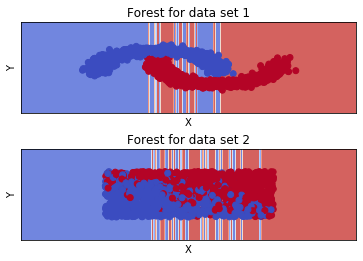

In [59]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

titles=['Forest for data set 1','Forest for data set 2']
X=list()
Y=list()
X.append(np.load('arr_0.npy'))
Y.append(np.load('arr_1.npy'))
X.append(np.load('arr_0_2.npy'))
Y.append(np.load('arr_1_2.npy'))

xx=list()
yy=list()
for s in range(0,2):
    h = .02
    x_min, x_max = X[s][:, 0].min() - 1, X[s][:, 0].max() + 1
    y_min, y_max = X[s][:, 1].min() - 1, X[s][:, 1].max() + 1
    a, b = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    xx.append(a)
    yy.append(b)

for i,forest in enumerate((dark_forest[0],dark_forest[1])):
    plt.subplot(2,1,i+1)
    plt.subplots_adjust(wspace=0.9, hspace=0.4)
    X_prime=np.c_[xx[i%2].ravel(), yy[i%2].ravel()]
    
    Z=np.array(forest_eval_decision_tree(forest, X_prime))
    #Z=np.array(eval_decision_tree(tre, X_prime))
#     for j in range(0,X_prime.shape[0]):
#         if(test_tree_y[j]!=Y_train_validate[j]):
#             count+=1

    
    #print("Z1: ",Z)
    #print(Z.shape)
    Z = Z.reshape(xx[i%2].shape)
    #print("Z2: ",Z)
    #print(Z.shape)
    plt.contourf(xx[i%2], yy[i%2], Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[i%2][:, 0], X[i%2][:, 1], c=Y[i%2], cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx[i%2].min(), xx[i%2].max())
    plt.ylim(yy[i%2].min(), yy[i%2].max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()




